In [20]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

from gensim import corpora
from gensim.models import LdaModel

import pandas as pd
import re
import ast
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# API endpoint
api_url = 'https://api.patentsview.org/patents/query'

# Helper function to fetch data for a specific country
def fetch_patents(country_code, max_pages=100, per_page=50):
    query = {
        "_and": [
            {"assignee_lastknown_country": country_code},
            {"_gte": {"patent_date": "2019-01-01"}}
        ]
    }

    # Fields to retrieve
    fields = [
        "patent_number",
        "patent_title",
        "patent_abstract",
        "assignee_organization",
        "assignee_lastknown_country",
        "patent_date"
    ]

    page = 1
    all_patents = []

    while True:
        # JSON body for the POST request
        payload = {
            "q": query,
            "f": fields,
            "o": {"per_page": per_page, "page": page}
        }

        # Make the API request
        response = requests.post(api_url, json=payload)

        if response.status_code == 200:
            # Parse response JSON
            data = response.json()
            if 'patents' in data and data['patents']:
                all_patents.extend(data['patents'])
                print(f"Page {page} retrieved: {len(data['patents'])} patents.")
                page += 1  # Move to the next page

                # Stop if max_pages is reached
                if page > max_pages:
                    print(f"Reached maximum page limit for {country_code}.")
                    break
            else:
                print(f"No more patents to retrieve for {country_code}.")
                break
        else:
            print(f"Failed at page {page} for {country_code}: {response.status_code}, {response.text}")
            break

    return all_patents

In [4]:
# Fetch U.S. patents
us_patents = fetch_patents("US", max_pages=100, per_page=50)

Page 1 retrieved: 50 patents.
Page 2 retrieved: 50 patents.
Page 3 retrieved: 50 patents.
Page 4 retrieved: 50 patents.
Page 5 retrieved: 50 patents.
Page 6 retrieved: 50 patents.
Page 7 retrieved: 50 patents.
Page 8 retrieved: 50 patents.
Page 9 retrieved: 50 patents.
Page 10 retrieved: 50 patents.
Page 11 retrieved: 50 patents.
Page 12 retrieved: 50 patents.
Page 13 retrieved: 50 patents.
Page 14 retrieved: 50 patents.
Page 15 retrieved: 50 patents.
Page 16 retrieved: 50 patents.
Page 17 retrieved: 50 patents.
Page 18 retrieved: 50 patents.
Page 19 retrieved: 50 patents.
Page 20 retrieved: 50 patents.
Page 21 retrieved: 50 patents.
Page 22 retrieved: 50 patents.
Page 23 retrieved: 50 patents.
Page 24 retrieved: 50 patents.
Page 25 retrieved: 50 patents.
Page 26 retrieved: 50 patents.
Page 27 retrieved: 50 patents.
Page 28 retrieved: 50 patents.
Page 29 retrieved: 50 patents.
Page 30 retrieved: 50 patents.
Page 31 retrieved: 50 patents.
Page 32 retrieved: 50 patents.
Page 33 retrieved

In [5]:
# Fetch Chinese patents
cn_patents = fetch_patents("CN", max_pages=100, per_page=50)

Page 1 retrieved: 50 patents.
Page 2 retrieved: 50 patents.
Page 3 retrieved: 50 patents.
Page 4 retrieved: 50 patents.
Page 5 retrieved: 50 patents.
Page 6 retrieved: 50 patents.
Page 7 retrieved: 50 patents.
Page 8 retrieved: 50 patents.
Page 9 retrieved: 50 patents.
Page 10 retrieved: 50 patents.
Page 11 retrieved: 50 patents.
Page 12 retrieved: 50 patents.
Page 13 retrieved: 50 patents.
Page 14 retrieved: 50 patents.
Page 15 retrieved: 50 patents.
Page 16 retrieved: 50 patents.
Page 17 retrieved: 50 patents.
Page 18 retrieved: 50 patents.
Page 19 retrieved: 50 patents.
Page 20 retrieved: 50 patents.
Page 21 retrieved: 50 patents.
Page 22 retrieved: 50 patents.
Page 23 retrieved: 50 patents.
Page 24 retrieved: 50 patents.
Page 25 retrieved: 50 patents.
Page 26 retrieved: 50 patents.
Page 27 retrieved: 50 patents.
Page 28 retrieved: 50 patents.
Page 29 retrieved: 50 patents.
Page 30 retrieved: 50 patents.
Page 31 retrieved: 50 patents.
Page 32 retrieved: 50 patents.
Page 33 retrieved

In [31]:
# Combine the data and save to a CSV
all_patents = us_patents + cn_patents
if all_patents:
    df_patents = pd.DataFrame(all_patents)
    df_patents.to_csv('us_cn_patents.csv', index=False)
    print(f"Saved {len(all_patents)} patents to 'us_cn_patents.csv'.")
else:
    print("No data retrieved.")

Saved 10000 patents to 'us_cn_patents.csv'.


In [32]:
df = pd.read_csv('us_cn_patents.csv')
df

,patent_number,patent_title,patent_abstract,patent_date,assignees
0,10165722,Scouting systems,Embodiments include a ground scout having an a...,2019-01-01,"[{'assignee_organization': 'DEERE & COMPANY', ..."
1,10165724,Potato seed planting apparatus and method of p...,A potato seed planting apparatus has: a frame ...,2019-01-01,"[{'assignee_organization': 'Crary Industries, ..."
2,10165725,Controlling ground engaging elements based on ...,An agricultural machine has a communication co...,2019-01-01,"[{'assignee_organization': 'DEERE & COMPANY', ..."
3,10165726,Agricultural header with multiple knife drives,An agricultural vehicle that includes a chassi...,2019-01-01,[{'assignee_organization': 'CNH Industrial Ame...
4,10165728,Edger with shielding assembly,An edger has a main frame that can be advanced...,2019-01-01,[{'assignee_organization': 'ECHO INCORPORATED'...
...,...,...,...,...,...
9995,10268243,Connector and an electronic device having the ...,A connector and an electronic device having th...,2019-04-23,[{'assignee_organization': 'Lenovo (Beijing) L...
9996,10268244,Housing assembly and electronic device,"A housing assembly includes a first housing, a...",2019-04-23,[{'assignee_organization': 'GUANGDONG OPPO MOB...
9997,10268245,Housing assembly and electronic device,A housing assembly is provided. The housing as...,2019-04-23,[{'assignee_organization': 'GUANGDONG OPPO MOB...
9998,10268265,"Information processing method, information pro...","An information processing method, an informati...",2019-04-23,[{'assignee_organization': 'BEIJING ZHIGU RUI ...


In [33]:
# Extract organization and country from nested structure in assignees
def extract_assignee_info(assignees):
    try:
        # Convert string to dictionary
        assignee_data = ast.literal_eval(assignees)
        # Extract organization and country
        organizations = [a.get('assignee_organization', '') for a in assignee_data]
        countries = [a.get('assignee_lastknown_country', '') for a in assignee_data]
        return ', '.join(organizations), ', '.join(countries)
    except Exception as e:
        return '', ''

In [34]:
df['assignee_organization'], df['assignee_lastknown_country'] = zip(
    *df['assignees'].apply(extract_assignee_info)
)

# Drop unnecessary fields for clarity
# df = df.drop(columns=['assignees'])

In [35]:
# Preprocessing function for abstracts
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = text.lower().split()  # Tokenize and lower-case
    tokens = [t for t in tokens if t not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize
    return tokens

In [36]:
# Apply preprocessing
df['tokens'] = df['patent_abstract'].fillna('').apply(preprocess_text)

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, passes=20, random_state=42)


# Display topics
print("LDA Topics:\n------------")
for idx, topic in lda_model.print_topics(num_words=10): print(f"Topic {idx}: {topic}")

LDA Topics:
------------
Topic 0: 0.018*"first" + 0.016*"includes" + 0.015*"end" + 0.014*"second" + 0.013*"body" + 0.013*"side" + 0.012*"plate" + 0.012*"member" + 0.011*"one" + 0.011*"assembly"
Topic 1: 0.057*"signal" + 0.040*"first" + 0.035*"circuit" + 0.033*"unit" + 0.030*"second" + 0.028*"control" + 0.022*"power" + 0.021*"voltage" + 0.020*"output" + 0.019*"module"
Topic 2: 0.032*"device" + 0.022*"information" + 0.021*"method" + 0.021*"first" + 0.019*"data" + 0.015*"system" + 0.014*"network" + 0.013*"user" + 0.011*"includes" + 0.011*"second"
Topic 3: 0.025*"image" + 0.022*"method" + 0.021*"data" + 0.017*"one" + 0.015*"based" + 0.015*"system" + 0.014*"may" + 0.011*"value" + 0.011*"user" + 0.010*"object"
Topic 4: 0.056*"layer" + 0.035*"first" + 0.035*"substrate" + 0.035*"display" + 0.027*"electrode" + 0.026*"second" + 0.021*"region" + 0.015*"device" + 0.015*"includes" + 0.015*"panel"
Topic 5: 0.022*"method" + 0.018*"invention" + 0.014*"present" + 0.009*"material" + 0.008*"composition" 

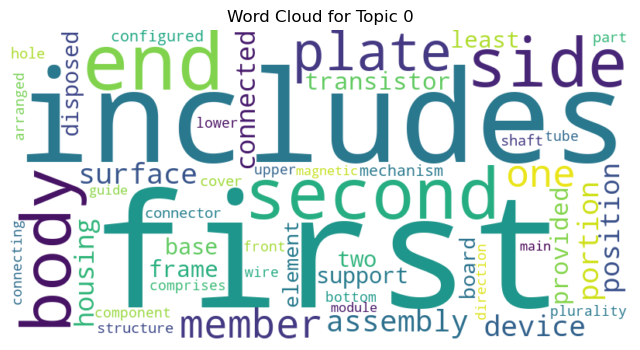

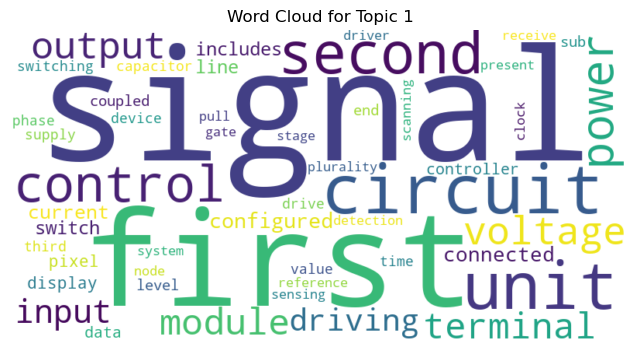

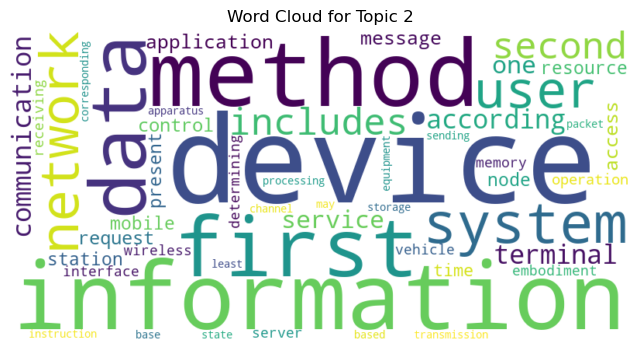

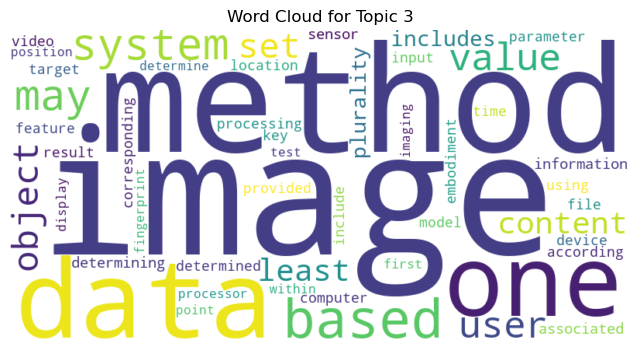

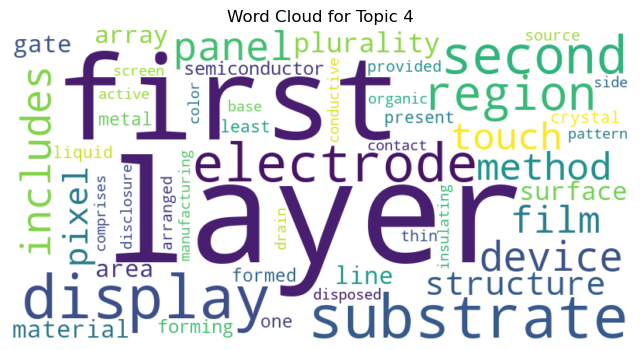

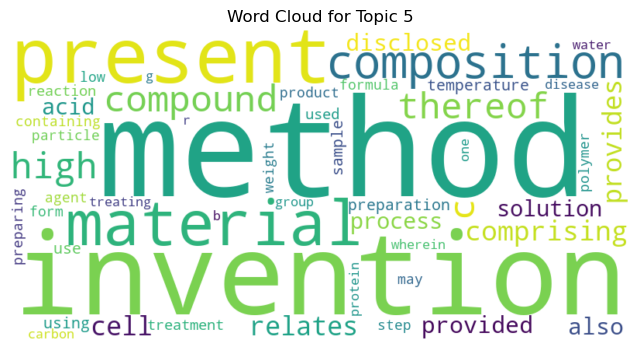

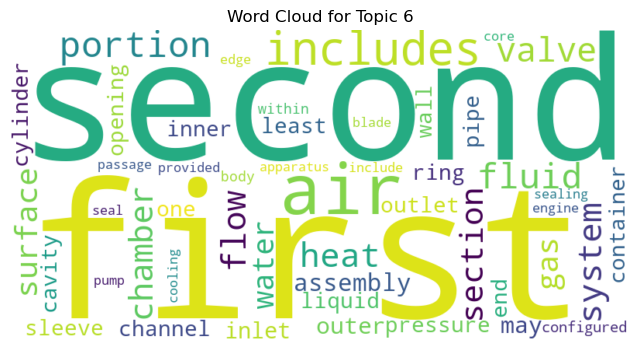

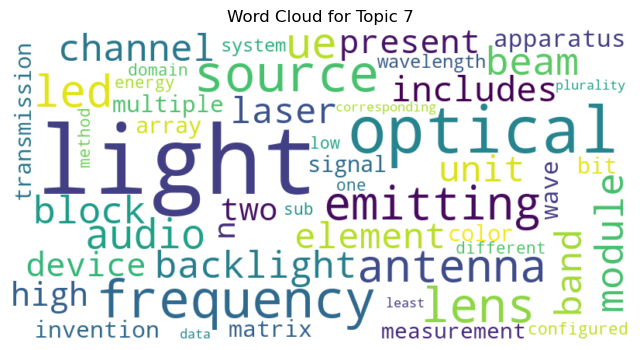

In [37]:
# Generate word clouds for each topic
for topic_idx in range(8):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(dict(lda_model.show_topic(topic_idx, 50)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {topic_idx}")
    plt.show()

In [38]:
# Assign dominant topic to each patent
def get_dominant_topic(lda_model, corpus):
    return [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

df['dominant_topic'] = get_dominant_topic(lda_model, corpus)

# Save updated dataset with topics
df.to_csv('us_cn_patents.csv', index=False)
print("Saved patents with topics to 'us_cn_patents.csv'.")

Saved patents with topics to 'us_cn_patents.csv'.


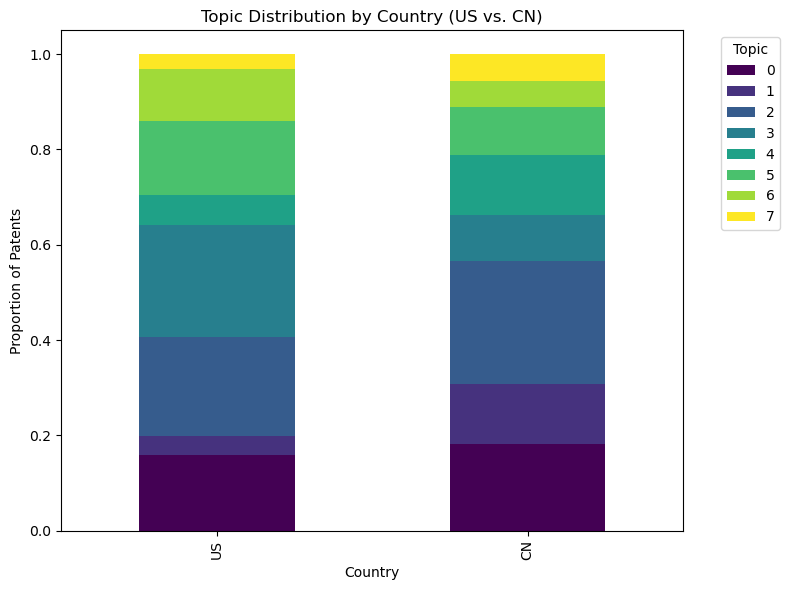

In [39]:
# Aggregate topic data by assignee_lastknown_country
topic_distribution = df.groupby(['assignee_lastknown_country', 'dominant_topic']).size().unstack(fill_value=0)

# Normalize for proportions
topic_distribution_percent = topic_distribution.div(topic_distribution.sum(axis=1), axis=0)

# Simplify the chart
topic_distribution_percent = topic_distribution_percent.loc[['US', 'CN']]

# Plot simplified chart
topic_distribution_percent.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Topic Distribution by Country (US vs. CN)')
plt.xlabel('Country')
plt.ylabel('Proportion of Patents')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("patent_topic_distribution.png", dpi=300)
plt.show()

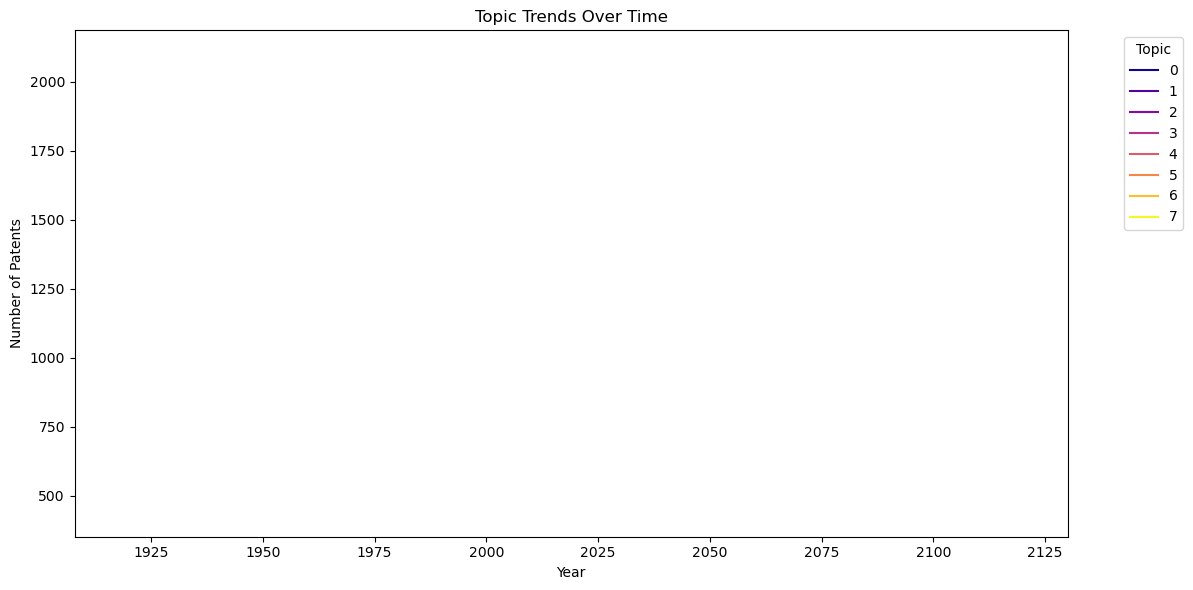

In [41]:
# Extract year from patent_date
df['year'] = pd.to_datetime(df['patent_date']).dt.year

# Group by year and topic for trends
topic_trends = df.groupby(['year', 'dominant_topic']).size().unstack(fill_value=0)

# Plot topic trends over time
topic_trends.plot(figsize=(12, 6), colormap='plasma')
plt.title('Topic Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("us_cn_patents_topics.png", dpi=300)
plt.show()